# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


 ## 1. Polynomial Regression (No linear regression)

### Use case
Develop a polynomial regression-based machine learning model to predict housing prices in Canada, using 20 years of historical data that includes socioeconomic and demographic characteristics such as population, median income, and mortgage interest rates.

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  


### Calculate correlation

Correlation matrix:
               Median income  Population  Mortgage Rate  Interest Rate  \
Median income       1.000000    0.928233      -0.726340      -0.582947   
Population          0.928233    1.000000      -0.813530      -0.612314   
Mortgage Rate      -0.726340   -0.813530       1.000000       0.841515   
Interest Rate      -0.582947   -0.612314       0.841515       1.000000   
price               0.703709    0.780786      -0.579921      -0.414241   

                  price  
Median income  0.703709  
Population     0.780786  
Mortgage Rate -0.579921  
Interest Rate -0.414241  
price          1.000000  


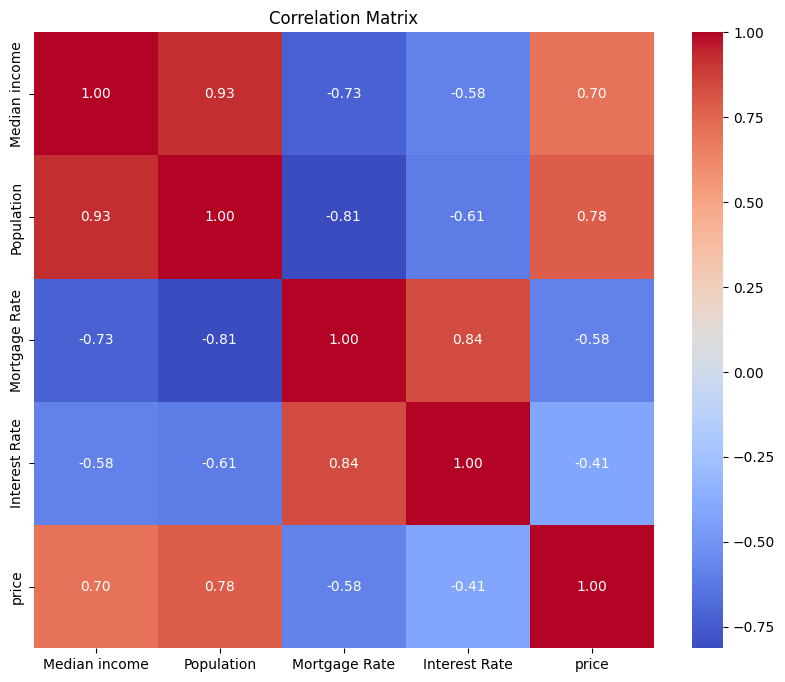

In [67]:
import pandas as pd
import numpy as np

# Since `Date` and `property_type` are non-numeric, we exclude them from the correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# If you want to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Trainning the Model

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Independent variables (Population, Median Income) and target variable (price)
X = df[['Population', 'Median income']].values
y = df['price'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Summary using statsmodels
# Add a constant to the model for the intercept
X_poly_train_sm = sm.add_constant(X_poly_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_poly_train_sm).fit()

# Print the summary
print(model_sm.summary())

Mean Squared Error: 8316734944.004949
R-squared: 0.62429739262656
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     382.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.43e-187
Time:                        23:48:55   Log-Likelihood:                -10744.
No. Observations:                 836   AIC:                         2.150e+04
Df Residuals:                     831   BIC:                         2.152e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

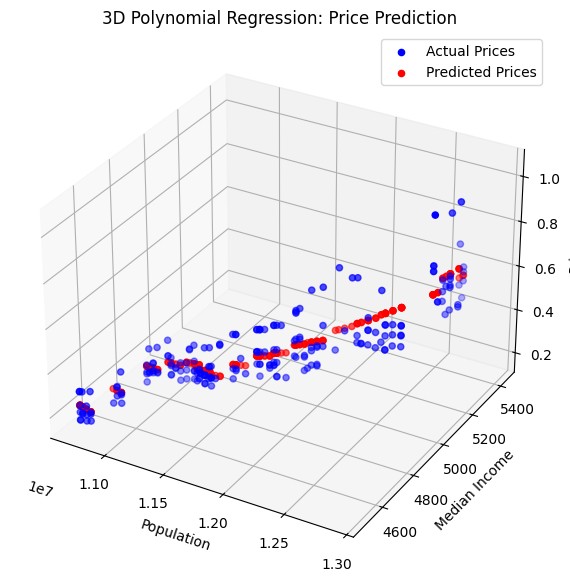

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Prices')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted Prices')

ax.set_xlabel('Population')
ax.set_ylabel('Median Income')
ax.set_zlabel('Price')
plt.title('3D Polynomial Regression: Price Prediction')
plt.legend()
plt.show()


 ### 2.  Logistic Regression

### Use Case
Predicting Price Categories (low, medium, high) of Properties in Canada Based on Macroeconomic Factors like 'Median income', 'Population', 'Mortgage Rate', 'Interest Rate' using a logistic regression supervised learning model that analyzes 20 years of economic and real estate market data.





### Prepare the dataset

In [70]:
bins = [0, 200000, 210000, 220000, float('inf')]
labels = ['low', 'medium', 'high', 'very_high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [71]:
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [72]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year


In [73]:
df = pd.get_dummies(df, columns=['property_type'], drop_first=True)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']] = scaler.fit_transform(df[['Median income', 'Population', 'Mortgage Rate', 'Interest Rate']])


In [75]:
df.head()

,Date,Median income,Population,Mortgage Rate,Interest Rate,price,price_category,month,year,property_type_Composite,property_type_One_storey,property_type_Townhouse,property_type_Two_storey
0,2005-01-01,-1.895491,-1.615949,1.086638,0.839017,207700,medium,1,2005,False,True,False,False
1,2005-02-01,-1.895491,-1.615949,1.076064,0.839017,208400,medium,2,2005,False,True,False,False
2,2005-03-01,-1.895491,-1.615949,1.086638,0.839017,209200,medium,3,2005,False,True,False,False
3,2005-04-01,-1.895491,-1.581883,1.160652,0.839017,210100,high,4,2005,False,True,False,False
4,2005-05-01,-1.895491,-1.581883,1.033770,0.839017,210600,high,5,2005,False,True,False,False


### Calculate correlation

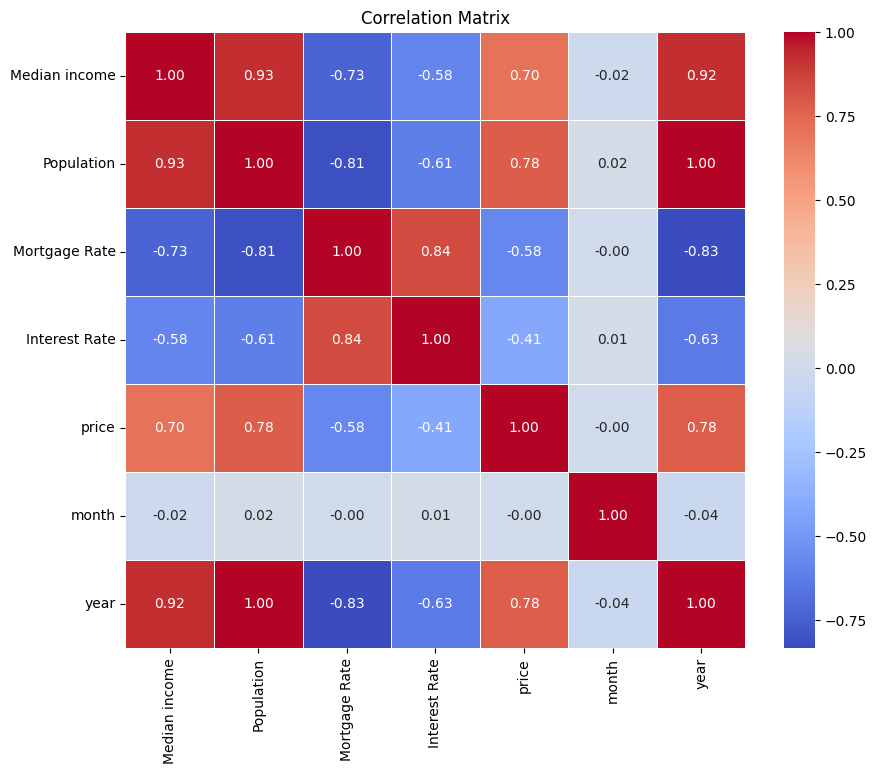

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Trainning the model

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [79]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Make predictions for the test set
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# If multiclass classification, calculate ROC-AUC (One-vs-Rest strategy)
if hasattr(model, "predict_proba"):
    # For multiclass, predict_proba returns a 2D array with probabilities for all classes
    y_prob = model.predict_proba(X_test)  # probabilities for all classes
    print("ROC-AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro'))  # One-vs-Rest strategy
else:
    print("Model does not have predict_proba method.")




Accuracy: 0.9425837320574163
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.94      1.00      0.97       197

    accuracy                           0.94       209
   macro avg       0.24      0.25      0.24       209
weighted avg       0.89      0.94      0.91       209

ROC-AUC: 0.9591850315711279


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  